In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class zero:
    
    def rvs(size):
        return 0.0

In [12]:
def create_experiment(mean=0.01, sigma=0.03, beta=1.4, noise=zero, sample_size=50):
    X = np.random.normal(loc=mean, scale=sigma, size=sample_size)
    Y = beta*X + noise.rvs(size=sample_size)
    return X,Y

In [13]:
def plot_hist(samples, true_mean, xlabel, bins=50):
    
    sample_mean = np.mean(samples)
    
    fig, ax = plt.subplots()
    ax.hist(samples, bins=50)
    ax.axvline(sample_mean, c='k', label='Sample mean: {}'.format(sample_mean))
    ax.axvline(true_mean, linestyle='--', c='r', label='True mean: {}'.format(true_mean))
    ax.set_xlabel(xlabel)
    ax.legend()
    
    return fig, ax

## Complete correlation

\begin{equation}
\begin{aligned}
    X &\sim \mathcal{N}(\mu, \sigma^{2}) \\
    Y &= \beta X
\end{aligned}
\end{equation}

\begin{equation}
    E[X] = \mu
\end{equation}

\begin{equation}
    V[X] = E[(X-E[X])^{2}] = \sigma^2
\end{equation}

\begin{equation}
    Cov[X,Y] = E[ (X-E[X]) (Y-E[Y]) ] = \beta \sigma^{2}
\end{equation}

\begin{equation}
    r
    =
    \frac{Cov[X,Y]}{\sqrt{V[X] V[Y]}}
    = 1
\end{equation}

In [14]:
nensemble = 1000
sample_size = 50

In [15]:
mean  = 0.01
sigma = 0.03
beta = 1.4
noise = zero

In [16]:
X_true_mean = mean
Y_true_mean = beta*mean

In [17]:
X_true_variance = sigma**2
Y_true_variance = beta**2 * sigma**2

In [18]:
XY_true_covariance = beta* sigma**2

In [19]:
experiments = np.array([create_experiment(mean=mean, sigma=sigma, beta=beta, noise=noise, sample_size=sample_size) for i in range(nensemble)])

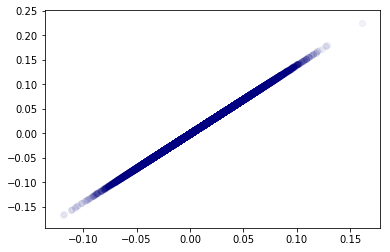

In [20]:
fig, ax = plt.subplots()
for X,Y in experiments:
    ax.scatter(X,Y, alpha=0.05, c='navy', rasterized=True)

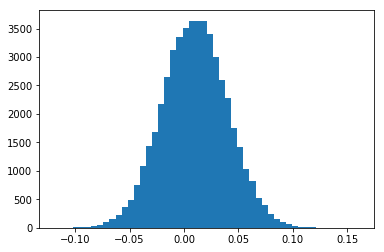

In [21]:
fig,ax = plt.subplots()
ax.hist(experiments[:,0].flatten(), bins=50);

## Mean

In [22]:
X_sample_means = np.mean(experiments[:,0],axis=1)
Y_sample_means = np.mean(experiments[:,1],axis=1)

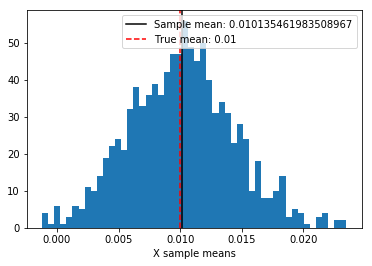

In [23]:
fig, ax = plot_hist(X_sample_means, true_mean=X_true_mean, xlabel='X sample means')

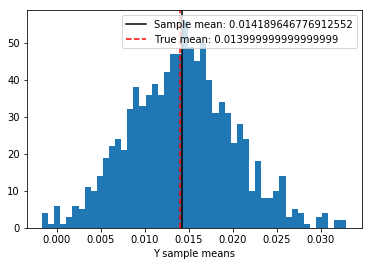

In [24]:
fig, ax = plot_hist(Y_sample_means, true_mean=Y_true_mean, xlabel='Y sample means')

## Variance

In [25]:
X_sample_variances = np.var(experiments[:,0],axis=1)
Y_sample_variances = np.var(experiments[:,1],axis=1)

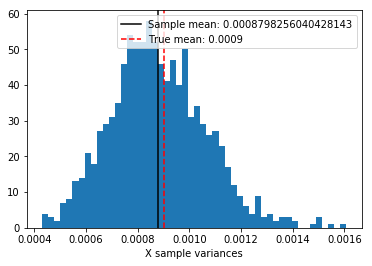

In [26]:
fig, ax = plot_hist(X_sample_variances, true_mean=X_true_variance, xlabel='X sample variances')

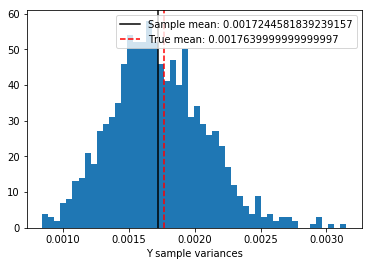

In [27]:
fig, ax = plot_hist(Y_sample_variances, true_mean=Y_true_variance, xlabel='Y sample variances')

## Covariances

In [28]:
XY_sample_covariances = np.array([np.cov(X,Y)[0,1] for X,Y in zip(experiments[:,0], experiments[:,1])])

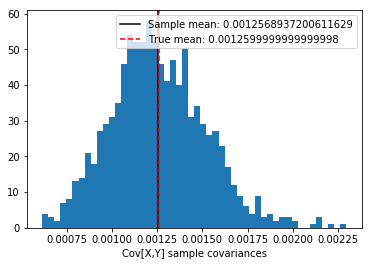

In [29]:
fig, ax = plot_hist(XY_sample_covariances, true_mean=XY_true_covariance, xlabel='Cov[X,Y] sample covariances')

In [30]:
XY_sample_correlation_coeff = np.array([np.corrcoef(X,Y)[0,1] for X,Y in zip(experiments[:,0], experiments[:,1])])

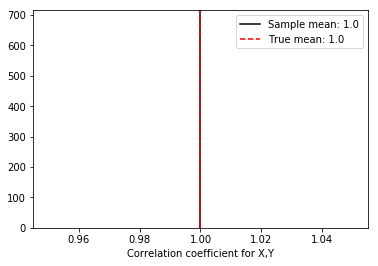

In [31]:
fig, ax = plot_hist(XY_sample_correlation_coeff, true_mean=1.0, xlabel='Correlation coefficient for X,Y')

## Partial correlation

\begin{equation}
\begin{aligned}
    X &\sim \mathcal{N}(\mu, \sigma^{2}) \\
    Y &= \beta X + \epsilon \\
    \epsilon &\sim \mathcal{N}(0, \delta^{2})
\end{aligned}
\end{equation}

In [32]:
nensemble = 1000
sample_size = 50

In [33]:
mean  = 0.01
sigma = 0.03
delta = 0.05
beta = 1.4
noise = scipy.stats.norm(loc=0.0, scale=delta)

In [34]:
noise.rvs()

-0.088480138067326505

In [35]:
noise.rvs()

-0.053798698631028145

In [36]:
X_true_mean = mean
Y_true_mean = beta*mean

In [37]:
X_true_variance = sigma**2
Y_true_variance = beta**2 * sigma**2 + delta**2

In [38]:
XY_true_covariance = beta* sigma**2

In [39]:
r_true = XY_true_covariance/np.sqrt(X_true_variance*Y_true_variance)

In [40]:
experiments = np.array([create_experiment(mean=mean, sigma=sigma, beta=beta, noise=noise, sample_size=sample_size) for i in range(nensemble)])

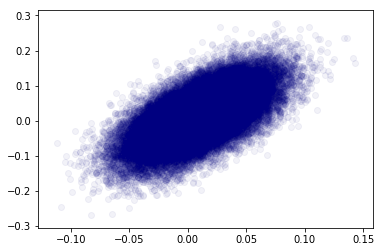

In [41]:
fig, ax = plt.subplots()
for X,Y in experiments:
    ax.scatter(X,Y, alpha=0.05, c='navy', rasterized=True)

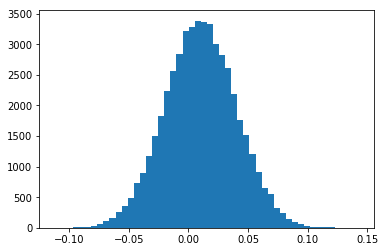

In [42]:
fig,ax = plt.subplots()
ax.hist(experiments[:,0].flatten(), bins=50);

## Mean

In [43]:
X_sample_means = np.mean(experiments[:,0],axis=1)
Y_sample_means = np.mean(experiments[:,1],axis=1)

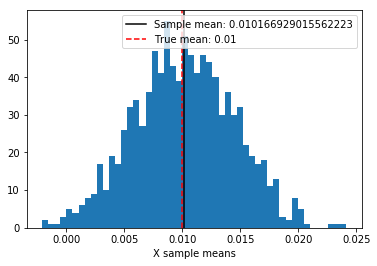

In [44]:
fig, ax = plot_hist(X_sample_means, true_mean=X_true_mean, xlabel='X sample means')

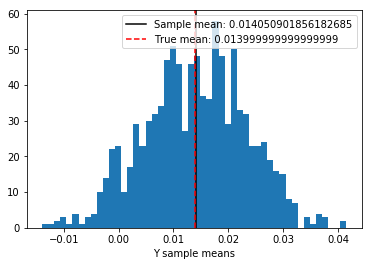

In [45]:
fig, ax = plot_hist(Y_sample_means, true_mean=Y_true_mean, xlabel='Y sample means')

## Variance

In [46]:
X_sample_variances = np.var(experiments[:,0],axis=1)
Y_sample_variances = np.var(experiments[:,1],axis=1)

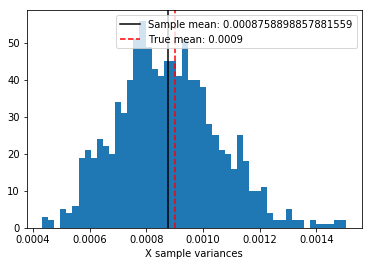

In [47]:
fig, ax = plot_hist(X_sample_variances, true_mean=X_true_variance, xlabel='X sample variances')

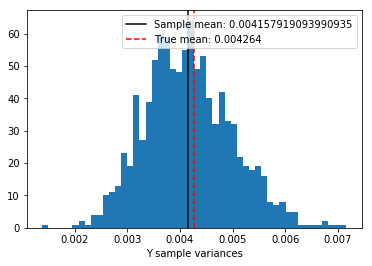

In [48]:
fig, ax = plot_hist(Y_sample_variances, true_mean=Y_true_variance, xlabel='Y sample variances')

## Covariances

In [49]:
XY_sample_covariances = np.array([np.cov(X,Y)[0,1] for X,Y in zip(experiments[:,0], experiments[:,1])])

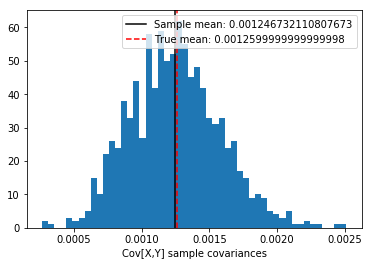

In [50]:
fig, ax = plot_hist(XY_sample_covariances, true_mean=XY_true_covariance, xlabel='Cov[X,Y] sample covariances')

## Correlation coefficient

In [51]:
XY_sample_correlation_coeff = np.array([np.corrcoef(X,Y)[0,1] for X,Y in zip(experiments[:,0], experiments[:,1])])

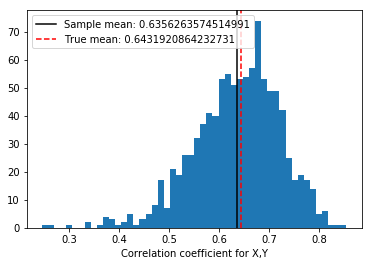

In [52]:
fig, ax = plot_hist(XY_sample_correlation_coeff, true_mean=r_true, xlabel='Correlation coefficient for X,Y')

## Linear regression

In [57]:
def calc_Sxx(x):
    xbar = np.mean(x)
    Sxx = np.sum( (x - xbar)*x)
    return Sxx

In [56]:
def calc_Sxy(x,y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    Sxy = np.sum( (x-xbar) * (y-ybar) )
    return Sxy

In [58]:
def calc_beta0hat(x, y):
    ybar = np.mean(y)
    xbar = np.mean(x)
    beta1hat = calc_beta1hat(x,y)
    beta0hat = ybar - xbar * beta1hat
    return beta0hat

In [59]:
def calc_beta1hat(x,y):
    Sxx = calc_Sxx(x)
    Sxy = calc_Sxy(x,y)
    beta1hat = Sxy/Sxx
    return beta1hat

In [62]:
beta1hats = [calc_beta1hat(X,Y) for X,Y in zip(experiments[:,0], experiments[:,1])]
beta0hats = [calc_beta0hat(X,Y) for X,Y in zip(experiments[:,0], experiments[:,1])]

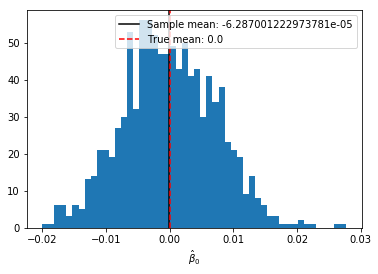

In [63]:
fig, ax = plot_hist(beta0hats, true_mean=0.0, xlabel=r'$\hat{\beta}_{0}$')

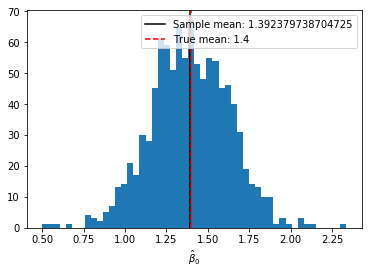

In [64]:
fig, ax = plot_hist(beta1hats, true_mean=beta, xlabel=r'$\hat{\beta}_{0}$')